In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'weight': np.linspace(55,95,100),
    'obesed': np.hstack((np.zeros(50),np.ones(50)))
}
df = pd.DataFrame(data)
df

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
95,93.383838,1.0
96,93.787879,1.0
97,94.191919,1.0
98,94.595960,1.0


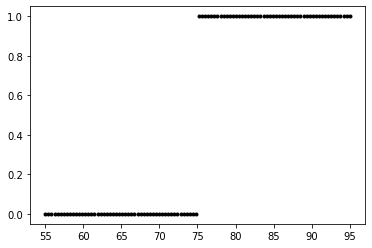

In [3]:
plt.plot(df['weight'], df['obesed'], 'k.')

In [4]:
half = int(len(df)/2)
df.iloc[half-1]

weight    74.79798
obesed     0.00000
Name: 49, dtype: float64

In [5]:
copy = df.copy()
copy2 = df.copy()

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr.fit(df[['weight']], df['obesed'])
df['pred'] = lr.predict(df[['weight']])

In [8]:
df

,weight,obesed,pred
0,55.000000,0.0,-0.242574
1,55.404040,0.0,-0.227573
2,55.808081,0.0,-0.212571
3,56.212121,0.0,-0.197570
4,56.616162,0.0,-0.182568
...,...,...,...
95,93.383838,1.0,1.182568
96,93.787879,1.0,1.197570
97,94.191919,1.0,1.212571
98,94.595960,1.0,1.227573


In [9]:
print(lr.coef_[0])
print(lr.intercept_)

0.037128712871287134
-2.284653465346535


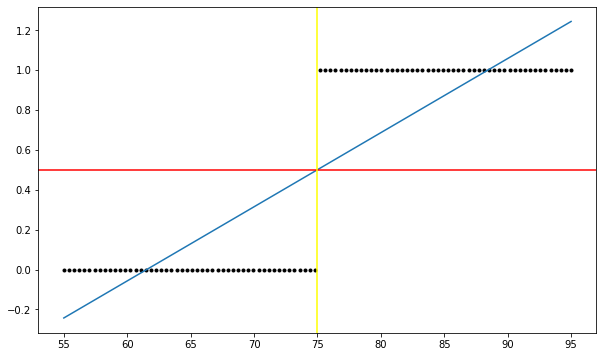

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df['weight'],df['obesed'],'k.')
plt.plot(df['weight'], df['pred'])
plt.axhline(0.5, color='red')
plt.axvline(x=75, ymin=0, ymax=1, color='yellow')

plt.show()

In [11]:
df['obesed_pred'] = df['pred'].apply(lambda x: 0 if x < 0.5 else 1)
df

,weight,obesed,pred,obesed_pred
0,55.000000,0.0,-0.242574,0
1,55.404040,0.0,-0.227573,0
2,55.808081,0.0,-0.212571,0
3,56.212121,0.0,-0.197570,0
4,56.616162,0.0,-0.182568,0
...,...,...,...,...
95,93.383838,1.0,1.182568,1
96,93.787879,1.0,1.197570,1
97,94.191919,1.0,1.212571,1
98,94.595960,1.0,1.227573,1


In [12]:
print(df.iloc[half])
print("\n")
print(df.iloc[half-1])

weight         75.202020
obesed          1.000000
pred            0.507501
obesed_pred     1.000000
Name: 50, dtype: float64


weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64


In [13]:
new_row = pd.DataFrame({'weight': [159,160,154,143], 'obesed': [1,1,1,1]})
copy = pd.concat([copy, new_row], axis=0, ignore_index=True)

In [14]:
copy

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [15]:
copy2 = copy.copy()
copy2

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [16]:
lrb = LinearRegression()
lrb.fit(copy[['weight']], copy['obesed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
copy['pred'] = lrb.predict(copy[['weight']])
copy

,weight,obesed,pred
0,55.000000,0.0,0.118695
1,55.404040,0.0,0.125719
2,55.808081,0.0,0.132744
3,56.212121,0.0,0.139768
4,56.616162,0.0,0.146793
...,...,...,...
99,95.000000,1.0,0.814116
100,159.000000,1.0,1.926790
101,160.000000,1.0,1.944175
102,154.000000,1.0,1.839862


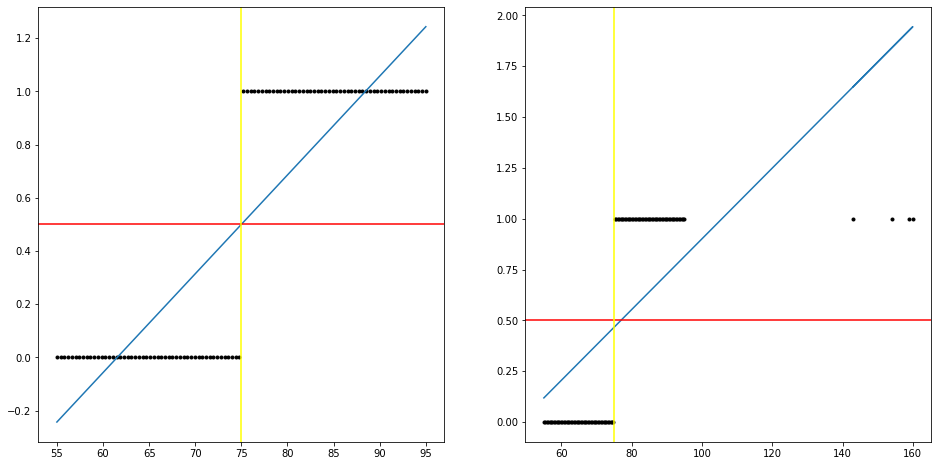

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(df['weight'], df['obesed'], 'k.')
plt.plot(df['weight'], df['pred'])
plt.axhline(0.5, color='red')
plt.axvline(x=75, ymin=0,ymax=1, color='yellow')

plt.subplot(122)
plt.plot(copy['weight'], copy['obesed'], 'k.')
plt.plot(copy['weight'], copy['pred'])
plt.axhline(0.5, color='red')
plt.axvline(x=75, ymin=0,ymax=1, color='yellow')

In [19]:
copy['obesed_pred'] = copy['pred'].apply(lambda x: 0 if x < 0.5 else 1)
copy

,weight,obesed,pred,obesed_pred
0,55.000000,0.0,0.118695,0
1,55.404040,0.0,0.125719,0
2,55.808081,0.0,0.132744,0
3,56.212121,0.0,0.139768,0
4,56.616162,0.0,0.146793,0
...,...,...,...,...
99,95.000000,1.0,0.814116,1
100,159.000000,1.0,1.926790,1
101,160.000000,1.0,1.944175,1
102,154.000000,1.0,1.839862,1


In [20]:
print(df.iloc[half])
print('\n')
print(df.iloc[half-1])

weight         75.202020
obesed          1.000000
pred            0.507501
obesed_pred     1.000000
Name: 50, dtype: float64


weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64


In [21]:
print(copy.iloc[half+5])
print('\n')
print(copy.iloc[half+4])
print('\n')
print(copy.iloc[half+3])
print('\n')
print(copy.iloc[half+2])
print('\n')
print(copy.iloc[half+1])
print('\n')
print(copy.iloc[half])

weight         77.222222
obesed          1.000000
pred            0.505040
obesed_pred     1.000000
Name: 55, dtype: float64


weight         76.818182
obesed          1.000000
pred            0.498016
obesed_pred     0.000000
Name: 54, dtype: float64


weight         76.414141
obesed          1.000000
pred            0.490991
obesed_pred     0.000000
Name: 53, dtype: float64


weight         76.010101
obesed          1.000000
pred            0.483967
obesed_pred     0.000000
Name: 52, dtype: float64


weight         75.606061
obesed          1.000000
pred            0.476942
obesed_pred     0.000000
Name: 51, dtype: float64


weight         75.202020
obesed          1.000000
pred            0.469918
obesed_pred     0.000000
Name: 50, dtype: float64


## Logistic Regression
Sigmoid Function

$\displaystyle sig(t) \hat{y} = \frac{1}{1+e^{-(mx+c)}}$

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
copy2

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [24]:
logreg = LogisticRegression()
logreg.fit(copy2[['weight']], copy2['obesed'])
print("b/m/slope", logreg.coef_[0])
print("a/c/intercept", logreg.intercept_[0])

b/m/slope [1.60239997]
a/c/intercept -120.17999785994184


In [25]:
b = logreg.coef_[0][0]
a = logreg.intercept_[0]
b,a

(1.6023999673056772, -120.17999785994184)

In [26]:
copy2['pred'] = logreg.predict(copy2[['weight']])
copy2['proba1'] = 1 / (1+np.exp(-1*(b*copy2['weight'] + a)))
copy2['proba0'] = 1 - copy2['proba1']
copy2

,weight,obesed,pred,proba1,proba0
0,55.000000,0.0,0.0,1.207065e-14,1.000000e+00
1,55.404040,0.0,0.0,2.306257e-14,1.000000e+00
2,55.808081,0.0,0.0,4.406410e-14,1.000000e+00
3,56.212121,0.0,0.0,8.419030e-14,1.000000e+00
4,56.616162,0.0,0.0,1.608567e-13,1.000000e+00
...,...,...,...,...,...
99,95.000000,1.0,1.0,1.000000e+00,1.199041e-14
100,159.000000,1.0,1.0,1.000000e+00,0.000000e+00
101,160.000000,1.0,1.0,1.000000e+00,0.000000e+00
102,154.000000,1.0,1.0,1.000000e+00,0.000000e+00


In [27]:
copy2.iloc[half-1]

weight    74.79798
obesed     0.00000
pred       0.00000
proba1     0.41977
proba0     0.58023
Name: 49, dtype: float64

In [28]:
df.iloc[half-1]

weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64

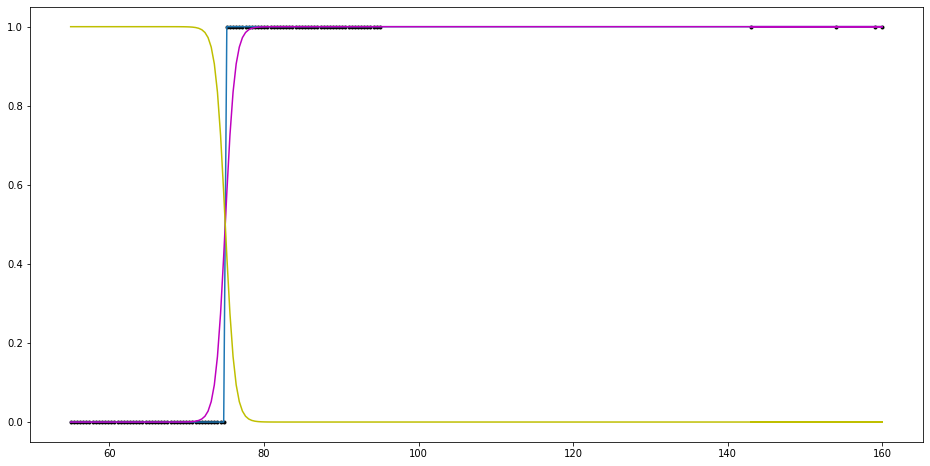

In [29]:
plt.figure(figsize=(16,8))
plt.plot(copy2['weight'], copy2['obesed'], 'k.')
plt.plot(copy2['weight'], copy2['pred'])
plt.plot(copy2['weight'], copy2['proba1'], 'm-')
plt.plot(copy2['weight'], copy2['proba0'], 'y-')

In [30]:
logreg.predict_proba(copy2[['weight']])

array([[1.00000000e+00, 1.20706482e-14],
       [1.00000000e+00, 2.30625725e-14],
       [1.00000000e+00, 4.40641002e-14],
       [1.00000000e+00, 8.41903012e-14],
       [1.00000000e+00, 1.60856724e-13],
       [1.00000000e+00, 3.07338083e-13],
       [1.00000000e+00, 5.87210124e-13],
       [1.00000000e+00, 1.12194274e-12],
       [1.00000000e+00, 2.14362024e-12],
       [1.00000000e+00, 4.09567046e-12],
       [1.00000000e+00, 7.82532102e-12],
       [1.00000000e+00, 1.49513125e-11],
       [1.00000000e+00, 2.85664634e-11],
       [1.00000000e+00, 5.45800128e-11],
       [1.00000000e+00, 1.04282345e-10],
       [1.00000000e+00, 1.99245237e-10],
       [1.00000000e+00, 3.80684421e-10],
       [9.99999999e-01, 7.27348021e-10],
       [9.99999999e-01, 1.38969475e-09],
       [9.99999997e-01, 2.65519593e-09],
       [9.99999995e-01, 5.07310359e-09],
       [9.99999990e-01, 9.69283646e-09],
       [9.99999981e-01, 1.85194480e-08],
       [9.99999965e-01, 3.53838584e-08],
       [9.999999

In [31]:
copy2['skproba1'] = logreg.predict_proba(copy2[['weight']])[:,1]
copy2['skproba0'] = logreg.predict_proba(copy2[['weight']])[:,0]
copy2

,weight,obesed,pred,proba1,proba0,skproba1,skproba0
0,55.000000,0.0,0.0,1.207065e-14,1.000000e+00,1.207065e-14,1.000000e+00
1,55.404040,0.0,0.0,2.306257e-14,1.000000e+00,2.306257e-14,1.000000e+00
2,55.808081,0.0,0.0,4.406410e-14,1.000000e+00,4.406410e-14,1.000000e+00
3,56.212121,0.0,0.0,8.419030e-14,1.000000e+00,8.419030e-14,1.000000e+00
4,56.616162,0.0,0.0,1.608567e-13,1.000000e+00,1.608567e-13,1.000000e+00
...,...,...,...,...,...,...,...
99,95.000000,1.0,1.0,1.000000e+00,1.199041e-14,1.000000e+00,1.199041e-14
100,159.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
101,160.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
102,154.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00


In [32]:
copy2['t0.8'] = copy2['skproba1'].apply(lambda x: 0 if x <= 0.7 else 1)
copy2

,weight,obesed,pred,proba1,proba0,skproba1,skproba0,t0.8
0,55.000000,0.0,0.0,1.207065e-14,1.000000e+00,1.207065e-14,1.000000e+00,0
1,55.404040,0.0,0.0,2.306257e-14,1.000000e+00,2.306257e-14,1.000000e+00,0
2,55.808081,0.0,0.0,4.406410e-14,1.000000e+00,4.406410e-14,1.000000e+00,0
3,56.212121,0.0,0.0,8.419030e-14,1.000000e+00,8.419030e-14,1.000000e+00,0
4,56.616162,0.0,0.0,1.608567e-13,1.000000e+00,1.608567e-13,1.000000e+00,0
...,...,...,...,...,...,...,...,...
99,95.000000,1.0,1.0,1.000000e+00,1.199041e-14,1.000000e+00,1.199041e-14,1
100,159.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1
101,160.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1
102,154.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1


In [33]:
copy2[copy2['skproba1']>=0.7]

,weight,obesed,pred,proba1,proba0,skproba1,skproba0,t0.8
51,75.606061,1.0,1.0,0.725349,2.746511e-01,0.725349,2.746511e-01,1
52,76.010101,1.0,1.0,0.834600,1.654000e-01,0.834600,1.654000e-01,1
53,76.414141,1.0,1.0,0.906023,9.397656e-02,0.906023,9.397656e-02,1
54,76.818182,1.0,1.0,0.948508,5.149247e-02,0.948508,5.149247e-02,1
55,77.222222,1.0,1.0,0.972371,2.762854e-02,0.972371,2.762854e-02,1
56,77.626263,1.0,1.0,0.985347,1.465337e-02,0.985347,1.465337e-02,1
57,78.030303,1.0,1.0,0.992277,7.723324e-03,0.992277,7.723324e-03,1
58,78.434343,1.0,1.0,0.995943,4.057221e-03,0.995943,4.057221e-03,1
59,78.838384,1.0,1.0,0.997872,2.127611e-03,0.997872,2.127611e-03,1
60,79.242424,1.0,1.0,0.998885,1.114694e-03,0.998885,1.114694e-03,1


In [34]:
from sklearn.metrics import plot_confusion_matrix

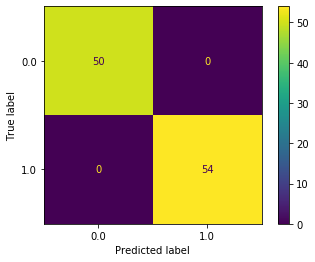

In [35]:
disp = plot_confusion_matrix(logreg, copy2[['weight']], copy2['obesed'])

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [37]:
accuracy_score(copy2['obesed'], copy2['pred'])

1.0

In [38]:
recall_score(copy2['obesed'], copy2['pred'], pos_label=1)

1.0

In [39]:
recall_score(copy2['obesed'], copy2['pred'], pos_label=0)

1.0

In [40]:
precision_score(copy2['obesed'], copy2['pred'], pos_label=1)

1.0

In [41]:
precision_score(copy2['obesed'], copy2['pred'], pos_label=0)

1.0

In [42]:
f1_score(copy2['obesed'], copy2['pred'])

1.0

In [43]:
import sklearn
sklearn.__version__

'0.22.1'

In [44]:
weight = copy2[['weight', 'obesed']]
weight

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [45]:
from sklearn.model_selection import train_test_split
X = weight[['weight']]
y = weight['obesed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=42)

In [46]:
len(X_train)

67

In [47]:
len(X_test)

37

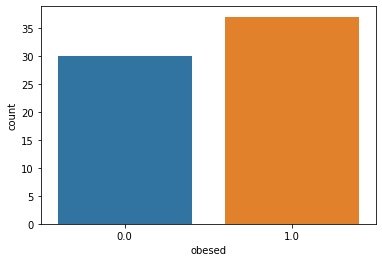

In [48]:
concat_train = pd.concat([X_train, y_train], axis=1)
sns.countplot(x='obesed', data=concat_train)

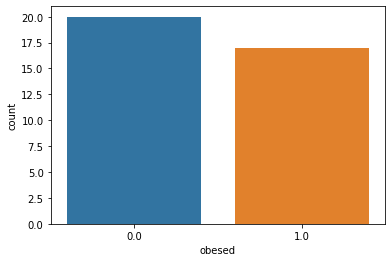

In [49]:
concat_test = pd.concat([X_test, y_test],axis=1)
sns.countplot(x='obesed', data=concat_test)

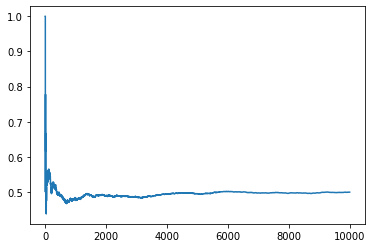

In [50]:
# INITIAL CODE
# ngga usah dicatet nggapapa
# intermezzo
from numpy.random import seed, randint
import matplotlib.pyplot as plt

seed(1)

def coin_toss():
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'
    
probabilities = []
heads = 0

for n in range(1, 10001):
    outcome = coin_toss()
    if outcome == 'HEAD':
        heads += 1
    current_probability = heads/n
    probabilities.append(current_probability)
# print('First tenth probabilities', probabilities[:11])
# print('Last tenth probabilities', probabilities[-10:])

plt.plot(list(range(1,10001)), probabilities)
plt.show()

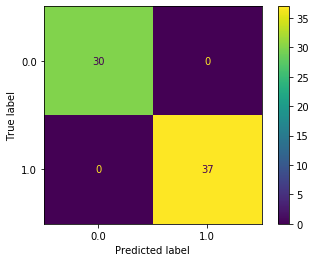

In [51]:
logreg.fit(X_train, y_train)
#confusion matrix yg train
conf_train = plot_confusion_matrix(logreg, X_train, y_train)

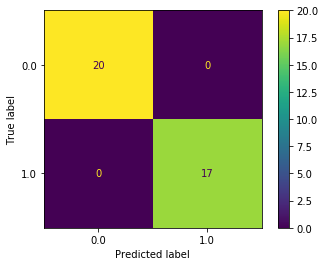

In [52]:
conf_test = plot_confusion_matrix(logreg, X_test, y_test)

In [53]:
obesed_pred = logreg.predict(X_test)

In [54]:
print(classification_report(y_test, obesed_pred, target_names=['0/-', '1/+']))

              precision    recall  f1-score   support

         0/-       1.00      1.00      1.00        20
         1/+       1.00      1.00      1.00        17

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [55]:
from sklearn.metrics import confusion_matrix

# confusion matrix bentuk 2 dimensi
confusion_matrix(y_test, obesed_pred)

array([[20,  0],
       [ 0, 17]], dtype=int64)

Beda ravel dan flatten = https://www.tutorialsandyou.com/python/difference-flatten-ravel-numpy-43.html

In [56]:
# confusion matrix dimasukkan ke dalam setiap variable
tn, fp, fn, tp = confusion_matrix(y_test, obesed_pred).ravel()

In [57]:
tn, fp, fn, tp

(20, 0, 0, 17)

In [58]:
obesed_proba = logreg.predict_proba(X_test)
obesed_proba

array([[9.99976961e-01, 2.30390465e-05],
       [1.64049824e-04, 9.99835950e-01],
       [2.85473149e-04, 9.99714527e-01],
       [1.12447080e-01, 8.87552920e-01],
       [9.14261015e-01, 8.57389854e-02],
       [2.99960057e-11, 1.00000000e+00],
       [9.08548792e-11, 1.00000000e+00],
       [7.78786734e-01, 2.21213266e-01],
       [1.00000000e+00, 3.54510960e-10],
       [1.00000000e+00, 1.39061608e-12],
       [9.99999970e-01, 2.98378544e-08],
       [9.99959904e-01, 4.00958418e-05],
       [4.78933782e-10, 1.00000000e+00],
       [9.90318938e-12, 1.00000000e+00],
       [2.12490747e-07, 9.99999788e-01],
       [1.00000000e+00, 1.27578125e-11],
       [4.03100532e-08, 9.99999960e-01],
       [9.99878564e-01, 1.21436290e-04],
       [9.99999999e-01, 1.07377713e-09],
       [9.99997489e-01, 2.51133384e-06],
       [1.87871940e-12, 1.00000000e+00],
       [4.01488695e-02, 9.59851130e-01],
       [9.99999726e-01, 2.73738859e-07],
       [3.69813019e-07, 9.99999630e-01],
       [9.488703

## Titanic

In [59]:
ttrain = pd.read_csv('titanic_train.csv')
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA (Exploratory Data Analysis)

In [60]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
ttrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
list_item = []
for column in ttrain.columns:
    list_item.append([column,
                    ttrain[column].dtype,
                    ttrain[column].isna().sum(),
                    round(ttrain[column].isna().sum()/len(ttrain[column])),
                    ttrain[column].nunique(),
                    list(ttrain[column].unique()[:2])
                     ])
desc_df = pd.DataFrame(data = list_item, columns=['features', 'dtype', 'null', 'null%', 'unique', 'unique_sample'])
desc_df

,features,dtype,null,null%,unique,unique_sample
0,PassengerId,int64,0,0.0,891,"[1, 2]"
1,Survived,int64,0,0.0,2,"[0, 1]"
2,Pclass,int64,0,0.0,3,"[3, 1]"
3,Name,object,0,0.0,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.0,2,"[male, female]"
5,Age,float64,177,0.0,88,"[22.0, 38.0]"
6,SibSp,int64,0,0.0,7,"[1, 0]"
7,Parch,int64,0,0.0,7,"[0, 1]"
8,Ticket,object,0,0.0,681,"[A/5 21171, PC 17599]"
9,Fare,float64,0,0.0,248,"[7.25, 71.2833]"


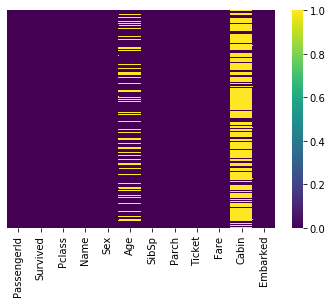

In [63]:
sns.heatmap(ttrain.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [64]:
ttrain['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

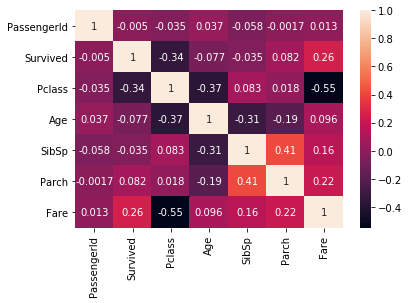

In [65]:
sns.heatmap(ttrain.corr(),annot=True)

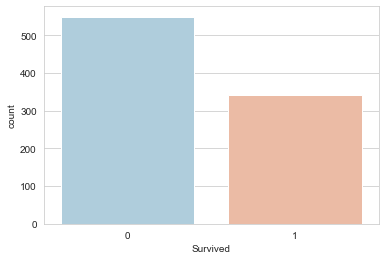

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=ttrain, palette='RdBu_r')
plt.show()

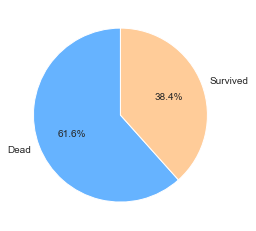

In [67]:
sizes = [len(ttrain[ttrain['Survived']==0]), len(ttrain[ttrain['Survived']==1])]
labels = ['Dead', 'Survived']
colors = ['#66b3ff','#ffcc99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

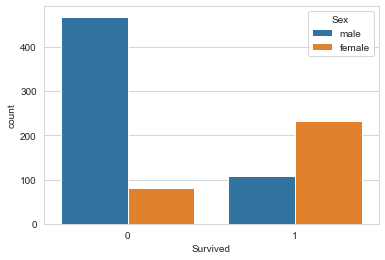

In [68]:
# perbandingan yang dead dan survived berdasarkan gender
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=ttrain)

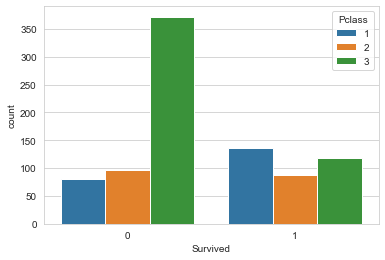

In [69]:
# perbandingan yang dead dan survived berdasarkan PClass
sns.countplot(x='Survived', hue='Pclass', data=ttrain)

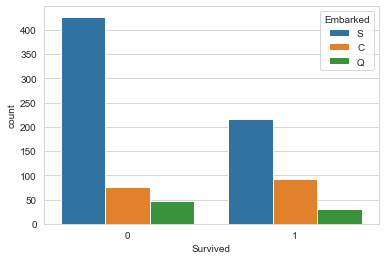

In [70]:
sns.countplot(x='Survived', hue='Embarked', data=ttrain)

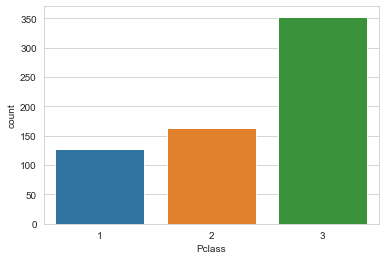

In [71]:
south =ttrain[ttrain['Embarked']=='S']
sns.countplot(x='Pclass', data=south)

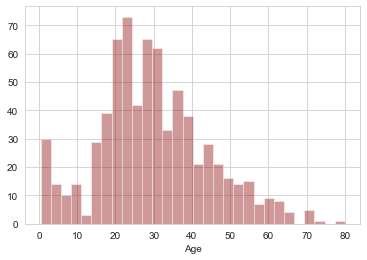

In [72]:
# distribusi umur penumpang titanic
sns.distplot(ttrain['Age'].dropna(), kde=False, color='darkred', bins=30)

In [73]:
ttrain[ttrain['Age'] > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


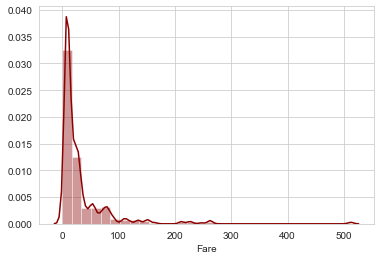

In [74]:
#distribusi harga tiket titanic
sns.distplot(ttrain['Fare'].dropna(), kde=True, color='darkred', bins=30)

In [75]:
ttrain[ttrain['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


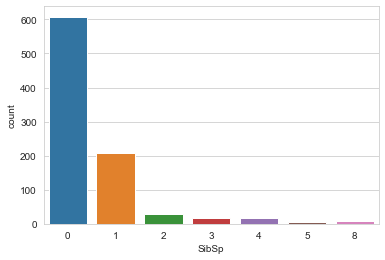

In [76]:
sns.countplot(x='SibSp', data=ttrain)

In [77]:
ttrain[ttrain['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [78]:
ttrain[ttrain['Name'].str.contains('Rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


In [79]:
ttrain[ttrain['Name'].str.contains('Jack')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


## Dealing With Missing Data

In [80]:
desc_df[['features', 'null', 'null%']]

,features,null,null%
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,0.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


## Dealing with Age Missing Data

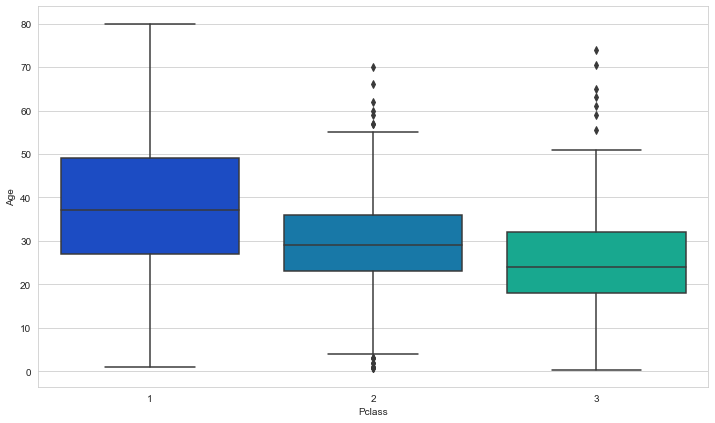

In [81]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=ttrain, palette='winter')

In [82]:
ttrain.groupby('Pclass')[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [83]:
# function untuk mengimputasi umur berdasarkan rata-rata umur tiap Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [84]:
ttrain['Age'] = ttrain[['Age', 'Pclass']].apply(impute_age,axis=1)

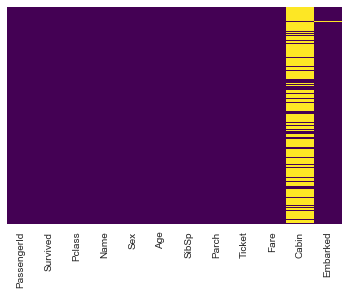

In [85]:
sns.heatmap(ttrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Cabin

In [86]:
ttrain[['Cabin']]

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [87]:
ttrain.drop('Cabin', axis=1, inplace=True)

In [88]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Embarked

In [89]:
ttrain.dropna(axis=0,inplace=True)

In [90]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## One Hot Encoding / get_dummies

In [91]:
desc_df

,features,dtype,null,null%,unique,unique_sample
0,PassengerId,int64,0,0.0,891,"[1, 2]"
1,Survived,int64,0,0.0,2,"[0, 1]"
2,Pclass,int64,0,0.0,3,"[3, 1]"
3,Name,object,0,0.0,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.0,2,"[male, female]"
5,Age,float64,177,0.0,88,"[22.0, 38.0]"
6,SibSp,int64,0,0.0,7,"[1, 0]"
7,Parch,int64,0,0.0,7,"[0, 1]"
8,Ticket,object,0,0.0,681,"[A/5 21171, PC 17599]"
9,Fare,float64,0,0.0,248,"[7.25, 71.2833]"


In [92]:
sex = pd.get_dummies(ttrain['Sex'], drop_first=True)
embark = pd.get_dummies(ttrain['Embarked'], drop_first=False)

In [93]:
# dropping unused collumns
# Sex dihapus karena sudah di dummy
# Embarked dihapus karena sudah di dummy
# Name dihapus karena ngga signifikan efeknya terhadap survived/not
# Ticket dihapus karena ngga signifikan efeknya terhadap survived/not
# PassengerID dihapus karena ngga signifikan efeknya terhadap survived/not

ttrain.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [94]:
ttrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [95]:
ttrain = pd.concat([ttrain,sex,embark], axis=1)
ttrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


## Train Test Split

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = ttrain.drop('Survived', axis=1)
y = ttrain['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
486,1,35.0,1,0,90.0000,0,0,0,1
293,3,24.0,0,0,8.8500,0,0,0,1
173,3,21.0,0,0,7.9250,1,0,0,1
450,2,36.0,1,2,27.7500,1,0,0,1
361,2,29.0,1,0,27.7208,1,1,0,0
...,...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,0,1
271,3,25.0,0,0,0.0000,1,0,0,1
862,1,48.0,0,0,25.9292,0,0,0,1
436,3,21.0,2,2,34.3750,0,0,0,1


In [99]:
y_train

486    1
293    0
173    0
450    0
361    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 622, dtype: int64

## Train The Model

In [100]:
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
# pengen tau version dari sebuah library
import sklearn
sklearn.__version__

'0.22.1'

In [102]:
train_survived = log.predict(X_train)
train_survived

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [103]:
from sklearn.metrics import confusion_matrix
cfmtx = confusion_matrix(y_train, train_survived)

In [104]:
cfmtx

array([[333,  49],
       [ 74, 166]], dtype=int64)

In [105]:
train_conf_mtx = pd.DataFrame(data=cfmtx, columns=['P Dead', 'P Survived'], index=['A Dead', 'A Survived'])
train_conf_mtx['Actual Cases'] = train_conf_mtx['P Dead'] + train_conf_mtx['P Survived']

train_pred_cases = pd.DataFrame({'P Dead': 392, 'P Survived': 230, 'Actual Cases': sum(train_conf_mtx['Actual Cases'])}, # value untuk tiap kolom
                               index=['Predicted Cases']) # nama index

train_conf_mtx = pd.concat([train_conf_mtx, train_pred_cases], axis=0)
train_conf_mtx

,P Dead,P Survived,Actual Cases
A Dead,333,49,382
A Survived,74,166,240
Predicted Cases,392,230,622


In [106]:
print(classification_report(y_train, train_survived, target_names=['0/-/Dead', '1/+/Survived']))

              precision    recall  f1-score   support

    0/-/Dead       0.82      0.87      0.84       382
1/+/Survived       0.77      0.69      0.73       240

    accuracy                           0.80       622
   macro avg       0.80      0.78      0.79       622
weighted avg       0.80      0.80      0.80       622



- precision(-) : dari semua tebakan / prediction negatif, berapa proportion yang beneran negatif = 0.82
- precision(+) : dari semua tebakan / prediction positif, berapa proportion yang beneran positif = 0.77
- recall(-) : dari semua actual cases yang negatif, berapa proportion yang benar memprediksi negatif = 0.86
- recall(+) : dari semua actual cases yang positif, berapa proportion yang benar memprediksi positif = 0.72

https://www.youtube.com/user/krishnaik06

## ROC dan AUC
ROC = Receiver Operating Characteristic

AUC = Area Under Curve

-------------------
ROC = Pembanding (Train-Test) / Pembanding (ModelA-ModelB) / Pembanding (MetodeA-MetodeB)

AUC = Untuk menilai seberapa baik, model kita memisahkan mana yang 0 sebagai 0, dan mana yang 1 sebagai 1 output > 0-1

-------------------

How ROC AUC works:
1. Model > Probability > Prediction 0/1 (default threshold = 0.5)
2. ROC akan me-looping sekian banyak threshold > New Prediction
3. Setiap Prediction > Confusion Matrix
4. Setiap Confusion Matrix > TN, FP, FN, TP > True Positive Rate (Recall+) dan False Positive Rate
5. Plot
    - y = TPR
    - x = FPR
6. Ulangi langkah 2-5.
7. Buat ROC Curve > Hitung AUC

In [107]:
proba_train = log.predict_proba(X_train)
proba_train

array([[0.12343604, 0.87656396],
       [0.33641954, 0.66358046],
       [0.85056983, 0.14943017],
       ...,
       [0.16342677, 0.83657323],
       [0.5021741 , 0.4978259 ],
       [0.90907156, 0.09092844]])

In [108]:
train_survived

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [110]:
probpred1 = proba_train[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_train, probpred1)
roc_auc1 = auc(fpr1, tpr1)

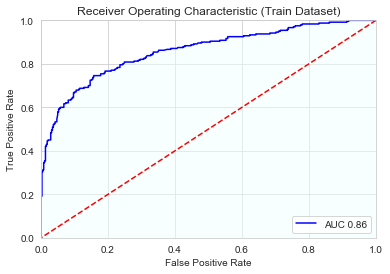

In [111]:
plt.title('Receiver Operating Characteristic (Train Dataset)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC {}'.format(round(roc_auc1,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr1, tpr1, 0, facecolor='azure',alpha=0.5)
plt.show()

In [112]:
roc_df = pd.DataFrame({'fpr': fpr1, 'tpr': tpr1, 'threshold':threshold1})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.985656
1,0.000000,0.004167,0.985656
2,0.000000,0.191667,0.893352
3,0.002618,0.191667,0.892458
4,0.002618,0.304167,0.832050
...,...,...,...
207,0.918848,1.000000,0.053682
208,0.931937,1.000000,0.051144
209,0.937173,1.000000,0.050961
210,0.992147,1.000000,0.014250


In [113]:
roc_df[roc_df['tpr'] >= 0.8].sort_values('fpr')

,fpr,tpr,threshold
100,0.243455,0.800000,0.323422
101,0.246073,0.800000,0.319759
102,0.248691,0.804167,0.314121
103,0.248691,0.808333,0.313608
104,0.277487,0.808333,0.289997
...,...,...,...
207,0.918848,1.000000,0.053682
208,0.931937,1.000000,0.051144
209,0.937173,1.000000,0.050961
210,0.992147,1.000000,0.014250


In [114]:
pred_survived_test = log.predict(X_test)
pred_survived_proba = log.predict_proba(X_test)

In [115]:
confusion_matrix(y_test, pred_survived_test)

array([[140,  27],
       [ 25,  75]], dtype=int64)

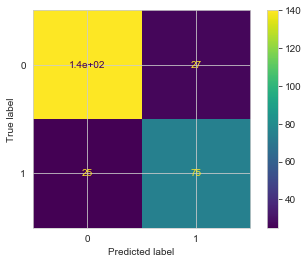

In [117]:
# ini khusus untuk yg version > 0.22
plot_confusion_matrix(log, X_test, y_test)

In [119]:
conf_mtx_test = pd.DataFrame(data=confusion_matrix(y_test, pred_survived_test), columns=['P Dead', 'P Survived'], index=['A Dead', 'A Survived'])
conf_mtx_test['Actual Cases'] = conf_mtx_test['P Dead'] + conf_mtx_test['P Survived']
pred_cases_test = pd.DataFrame({'P Dead': [sum(conf_mtx_test['P Dead'])],
                               'P Survived': [sum(conf_mtx_test['P Survived'])],
                               'Actual Cases': [sum(conf_mtx_test['Actual Cases'])]}, index=['Predicted Cases'])
conf_mtx_test = pd.concat([conf_mtx_test, pred_cases_test],axis=0)
conf_mtx_test

,P Dead,P Survived,Actual Cases
A Dead,140,27,167
A Survived,25,75,100
Predicted Cases,165,102,267


In [120]:
print(classification_report(y_test, pred_survived_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       167
           1       0.74      0.75      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [121]:
pred_survived_proba

array([[0.88786312, 0.11213688],
       [0.04408267, 0.95591733],
       [0.221818  , 0.778182  ],
       [0.75601975, 0.24398025],
       [0.03760339, 0.96239661],
       [0.88334955, 0.11665045],
       [0.71000305, 0.28999695],
       [0.85029689, 0.14970311],
       [0.08153554, 0.91846446],
       [0.03610535, 0.96389465],
       [0.60671562, 0.39328438],
       [0.44323025, 0.55676975],
       [0.95910918, 0.04089082],
       [0.86506026, 0.13493974],
       [0.89201335, 0.10798665],
       [0.88354227, 0.11645773],
       [0.66516705, 0.33483295],
       [0.79580529, 0.20419471],
       [0.72923982, 0.27076018],
       [0.87298658, 0.12701342],
       [0.75977754, 0.24022246],
       [0.09899061, 0.90100939],
       [0.93745785, 0.06254215],
       [0.46964107, 0.53035893],
       [0.87293682, 0.12706318],
       [0.49316225, 0.50683775],
       [0.69946576, 0.30053424],
       [0.17646271, 0.82353729],
       [0.59988602, 0.40011398],
       [0.72107278, 0.27892722],
       [0.

In [122]:
predtest1 = pred_survived_proba[:,1]
fprts1, tprts1, thresholdts1 = roc_curve(y_test, predtest1)
roc_auc_test1 = auc(fprts1, tprts1)

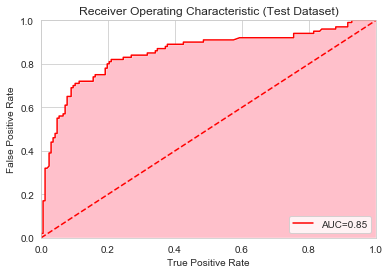

In [123]:
plt.title('Receiver Operating Characteristic (Test Dataset)')
plt.plot(fprts1, tprts1, 'r', label='AUC={}'.format(round(roc_auc_test1,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.fill_between(fprts1, tprts1, 0, facecolor='pink', alpha=1)
plt.show()

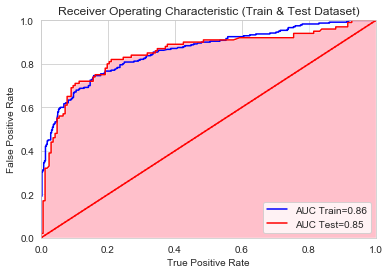

In [125]:
plt.title('Receiver Operating Characteristic (Train & Test Dataset)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC Train={}'.format(round(roc_auc1,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr1, tpr1, 0, facecolor='azure',alpha=0.5)
plt.plot(fprts1, tprts1, 'r', label='AUC Test={}'.format(round(roc_auc_test1,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.fill_between(fprts1, tprts1, 0, facecolor='pink', alpha=1)
plt.show()

- Oversampling = kita hanya memperbanyak data (yang minoritas) berdasarkan data yang sudah ada (duplikasi data)
- Undersampling = kita hanya mengurangi data (yang mayoritas) sehingga menyamai jumlah yang minoritas
- SMOTE = smote ini membuat sebuah data baru, dengan mengadaptasi algoritma KNN.

## Oversampling

In [126]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
486,1,35.0,1,0,90.0000,0,0,0,1
293,3,24.0,0,0,8.8500,0,0,0,1
173,3,21.0,0,0,7.9250,1,0,0,1
450,2,36.0,1,2,27.7500,1,0,0,1
361,2,29.0,1,0,27.7208,1,1,0,0
...,...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,0,1
271,3,25.0,0,0,0.0000,1,0,0,1
862,1,48.0,0,0,25.9292,0,0,0,1
436,3,21.0,2,2,34.3750,0,0,0,1


In [127]:
y_train

486    1
293    0
173    0
450    0
361    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 622, dtype: int64

In [128]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
486,1,35.0,1,0,90.0000,0,0,0,1,1
293,3,24.0,0,0,8.8500,0,0,0,1,0
173,3,21.0,0,0,7.9250,1,0,0,1,0
450,2,36.0,1,2,27.7500,1,0,0,1,0
361,2,29.0,1,0,27.7208,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,0,1,1
271,3,25.0,0,0,0.0000,1,0,0,1,1
862,1,48.0,0,0,25.9292,0,0,0,1,1
436,3,21.0,2,2,34.3750,0,0,0,1,0


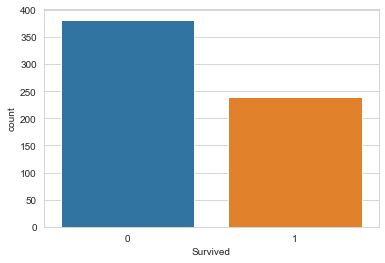

In [129]:
sns.countplot(x='Survived', data=df_train)

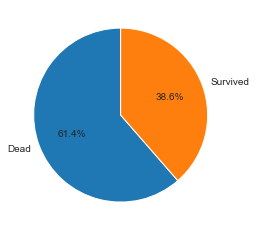

In [130]:
sizes = [len(df_train[df_train['Survived']==0]), len(df_train[df_train['Survived']==1])]
labels = ['Dead', 'Survived']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

In [131]:
# pisahkan antara mayoritas dan minoritas
not_survived = df_train[df_train['Survived']==0]
survived = df_train[df_train['Survived']==1]

In [133]:
not_survived['Survived'].unique()

array([0], dtype=int64)

In [134]:
survived['Survived'].unique()

array([1], dtype=int64)

In [135]:
from sklearn.utils import resample

survived_upsampled = resample(survived, #siapa yang mau di resample
                             replace=True,
                             n_samples=len(not_survived), #sebanyak apa samplingnya? sebanyak not_survived
                             random_state=42)

In [136]:
survived_upsampled

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
400,3,39.0,0,0,7.9250,1,0,0,1,1
762,3,20.0,0,0,7.2292,1,1,0,0,1
641,1,24.0,0,0,69.3000,0,1,0,0,1
328,3,31.0,1,1,20.5250,0,0,0,1,1
747,2,30.0,0,0,13.0000,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,1,40.0,0,0,153.4625,0,0,0,1,1
641,1,24.0,0,0,69.3000,0,1,0,0,1
298,1,38.0,0,0,30.5000,1,0,0,1,1
857,1,51.0,0,0,26.5500,1,0,0,1,1


In [137]:
upsampled_train = pd.concat([not_survived, survived_upsampled])

In [138]:
upsampled_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
293,3,24.0,0,0,8.8500,0,0,0,1,0
173,3,21.0,0,0,7.9250,1,0,0,1,0
450,2,36.0,1,2,27.7500,1,0,0,1,0
361,2,29.0,1,0,27.7208,1,1,0,0,0
332,1,38.0,0,1,153.4625,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
609,1,40.0,0,0,153.4625,0,0,0,1,1
641,1,24.0,0,0,69.3000,0,1,0,0,1
298,1,38.0,0,0,30.5000,1,0,0,1,1
857,1,51.0,0,0,26.5500,1,0,0,1,1


In [140]:
upsampled_train.Survived.value_counts()

1    382
0    382
Name: Survived, dtype: int64

In [141]:
# dataframe hasil oversampling di split kembali menjadi X_train dan y_train.
Xup_train = upsampled_train.drop('Survived', axis=1)
yup_train = upsampled_train['Survived']

In [142]:
uplogreg = LogisticRegression(solver='lbfgs') # untuk yg version 0.21 itu solver defaultnya = 'liblinear', sedangkan 0.22 > 'lbfgs'
uplogreg.fit(Xup_train, yup_train)
uppred = uplogreg.predict(X_test)
upproba = uplogreg.predict_proba(X_test)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## After Oversampling

In [143]:
print(classification_report(y_test, uppred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       167
           1       0.69      0.79      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



## Before Oversampling

In [144]:
print(classification_report(y_test, pred_survived_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       167
           1       0.74      0.75      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



## Undersampling

In [145]:
survived

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
486,1,35.00,1,0,90.0000,0,0,0,1,1
469,3,0.75,2,1,19.2583,0,1,0,0,1
334,1,38.00,1,0,133.6500,0,0,0,1,1
681,1,27.00,0,0,76.7292,1,1,0,0,1
136,1,19.00,0,2,26.2833,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
615,2,24.00,1,2,65.0000,0,0,0,1,1
701,1,35.00,0,0,26.2875,1,0,0,1,1
107,3,25.00,0,0,7.7750,1,0,0,1,1
271,3,25.00,0,0,0.0000,1,0,0,1,1


In [146]:
not_survived

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
293,3,24.0,0,0,8.8500,0,0,0,1,0
173,3,21.0,0,0,7.9250,1,0,0,1,0
450,2,36.0,1,2,27.7500,1,0,0,1,0
361,2,29.0,1,0,27.7208,1,1,0,0,0
332,1,38.0,0,1,153.4625,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
122,2,32.5,1,0,30.0708,1,1,0,0,0
20,2,35.0,0,0,26.0000,1,0,0,1,0
72,2,21.0,0,0,73.5000,1,0,0,1,0
436,3,21.0,2,2,34.3750,0,0,0,1,0


In [147]:
not_survived_downsampled = resample(not_survived, #siapa yang mau di undersampling
                                   replace=False,
                                   n_samples=len(survived),
                                   random_state=42)

downsampled = pd.concat([not_survived_downsampled, survived])

downsampled.Survived.value_counts()

1    240
0    240
Name: Survived, dtype: int64

In [148]:
downsampled

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
96,1,71.0,0,0,34.6542,1,1,0,0,0
773,3,25.0,0,0,7.2250,1,1,0,0,0
349,3,42.0,0,0,8.6625,1,0,0,1,0
402,3,21.0,1,0,9.8250,0,0,0,1,0
542,3,11.0,4,2,31.2750,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
615,2,24.0,1,2,65.0000,0,0,0,1,1
701,1,35.0,0,0,26.2875,1,0,0,1,1
107,3,25.0,0,0,7.7750,1,0,0,1,1
271,3,25.0,0,0,0.0000,1,0,0,1,1


In [150]:
Xdown_train = downsampled.drop('Survived', axis=1)
ydown_train = downsampled['Survived']

downlogreg = LogisticRegression().fit(Xdown_train, ydown_train)
downpred = downlogreg.predict(X_test)
downproba = downlogreg.predict_proba(X_test)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [151]:
print(classification_report(y_test, downpred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       167
           1       0.69      0.79      0.73       100

    accuracy                           0.79       267
   macro avg       0.77      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



In [152]:
print(classification_report(y_test, uppred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       167
           1       0.69      0.79      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



In [153]:
upscore1 = upproba[:,1]
fpr_up1, tpr_up1, threshold_up1 = roc_curve(y_test, upscore1)
roc_auc_up1 = auc(fpr_up1, tpr_up1)

downscore1 = downproba[:,1]
fpr_down1, tpr_down1, threshold_down1 = roc_curve(y_test, downscore1)
roc_auc_down1 = auc(fpr_down1, tpr_down1)

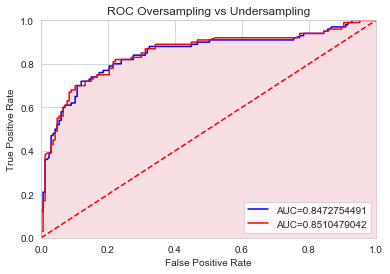

In [157]:
plt.title('ROC Oversampling vs Undersampling')
plt.plot(fpr_up1, tpr_up1, 'blue', label='AUC={}'.format(round(roc_auc_up1,10)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_up1, tpr_up1, 0, facecolor='azure', alpha=1)

plt.plot(fpr_down1, tpr_down1, 'red', label='AUC={}'.format(round(roc_auc_down1,10)))
plt.fill_between(fpr_down1, tpr_down1, 0, facecolor='pink', alpha=0.5)
plt.legend(loc = 'lower right')
plt.show()

## Smote

In [158]:
from imblearn.over_sampling import SMOTE

In [160]:
sm = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
Xsmot_train, ysmot_train = sm.fit_sample(X_train, y_train)

In [161]:
Xsmot_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,35.000000,1,0,90.000000,0,0,0,1
1,3,24.000000,0,0,8.850000,0,0,0,1
2,3,21.000000,0,0,7.925000,1,0,0,1
3,2,36.000000,1,2,27.750000,1,0,0,1
4,2,29.000000,1,0,27.720800,1,1,0,0
...,...,...,...,...,...,...,...,...,...
759,1,37.194575,0,0,80.347730,0,0,0,0
760,1,38.000000,0,0,30.088224,1,0,0,0
761,1,23.118061,0,1,51.714394,0,1,0,0
762,1,50.184074,1,0,77.336038,0,1,0,0


In [163]:
ysmot_train.value_counts()

1    382
0    382
Name: Survived, dtype: int64

In [166]:
smlogreg = LogisticRegression(solver='lbfgs')
smlogreg.fit(Xsmot_train, ysmot_train)
smpred = smlogreg.predict(X_test)
smproba = smlogreg.predict_proba(X_test)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [167]:
print(classification_report(y_test, smpred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       167
           1       0.72      0.77      0.74       100

    accuracy                           0.80       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.81      0.80      0.80       267



In [168]:
print(classification_report(y_test, uppred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       167
           1       0.69      0.79      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267

